<a href="https://colab.research.google.com/github/startbkgogo/first/blob/main/ch06_high.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
# 코랩에서 실행될 때 코랩의 리눅스 시스템에 처리 - 글꼴 등록
if "google.colab" in sys.modules:
    print("구글 코랩에서 실행 중입니다.")
    # 리눅스 확인
    !echo "debconf debconf/frontend select Noninteractive" | \
    debconf-set-selections
    # 나눔 폰트를 설치합니다.
    # 리눅스 처리문 - 관리자 권한 처리 : sudo
    # apt-get : 패키지 관리 명령
    # -qq : 진행 상황 최소 출력. -y : yes/no 를 물어 보면 yes로 처리해라.
    !sudo apt-get -qq -y install fonts-nanum
    # 폰트 세팅을 위해 필요한 라이브러리 import
    import matplotlib.font_manager as fm
    # 폰트 설치 진행
    font_files = fm.findSystemFonts(fontpaths=["/usr/share/fonts/truetype/nanum"])
    for fpath in font_files:
      fm.fontManager.addfont(fpath)

구글 코랩에서 실행 중입니다.
Selecting previously unselected package fonts-nanum.
(Reading database ... 126332 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import matplotlib.pyplot as plt

# 나눔바른 고딕 폰트로 설정
plt.rc("font", family="NanumBarunGothic")

# 그래프 DPI 기본 값을 변경
plt.rcParams["figure.dpi"] = 100

In [3]:
# 작업할 데이터 준비
import gdown
# 필요한 데이터 파일 다운 진행
gdown.download("https://bit.ly/3pK7iuu","ns_book7.csv",quiet=False)
import pandas as pd
# pandas의 데이터 프레임으로 불러오자. -> ns_book7
ns_book7 = pd.read_csv("ns_book7.csv", low_memory=False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 171MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [43]:
# 하나의 피겨에 여러개의 선 그래프 그리기
# 출판사 이름이 가장 많이 나타나는 상위 30개의 데이터
# 인덱스 - 출판사, 값 - 출판사의 카운트
top30_pubs = ns_book7["출판사"].value_counts()[:30]
top30_pubs_idx = ns_book7["출판사"].isin(top30_pubs.index)
# 30개의 출판사의 인덱스에 대해서 - ["출판사", "발행년도", "대출건수"] 에 대한 데이터 - book9
ns_book9 = ns_book7[top30_pubs_idx][["출판사", "발행년도", "대출건수"]]
# 출판사와 발행년도를 그룹으로 묶어서 책과 상관없이 대출건수를 더한다.
ns_book9 = ns_book9.groupby(by=["출판사", "발행년도"]).sum()
# 인덱스를 붙인다.
ns_book9 = ns_book9.reset_index()
ns_book9[ns_book9["출판사"] == "황금가지"]
# ns_book9[ns_book9["출판사"] == "문학동네"].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505
863,황금가지,2000,1152
864,황금가지,2001,722
865,황금가지,2002,1493
866,황금가지,2003,2001
867,황금가지,2004,2744


In [35]:
top30_pubs

,count
출판사,
문학동네,4410
민음사,3349
김영사,3246
웅진씽크빅,3227
시공사,2685
창비,2469
문학과지성사,2064
위즈덤하우스,1981
학지사,1877


In [36]:
ns_book9.head()

,출판사,발행년도,대출건수
0,博英社,1947,0
1,博英社,1975,0
2,博英社,1977,0
3,博英社,1986,1
4,博英社,1987,1


In [38]:
# line1 - 출판사가 황금가지 데이터
line1 = ns_book9[ns_book9["출판사"] == "황금가지"]
line2 = ns_book9[ns_book9["출판사"] == "비룡소"]

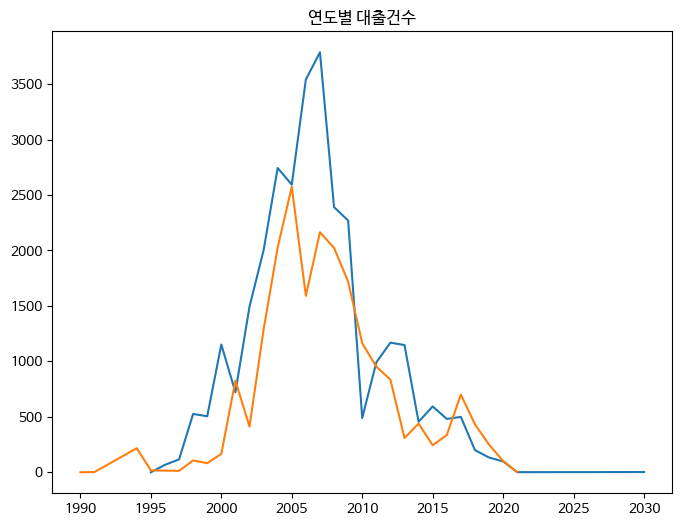

In [42]:
# 그려지는 객체 1개 ax
fig, ax = plt.subplots(figsize=(8, 6))
# 비교 출판사 선택 - 황금가지, 비룡소
# plot() - line 그래프.plot(x축 데이터, y축 데이터)
ax.plot(line1["발행년도"], line1["대출건수"]) # 황금가지 출판사
ax.plot(line2["발행년도"], line2["대출건수"]) # 비룡소 출판사
ax.set_title("연도별 대출건수")
fig.show()

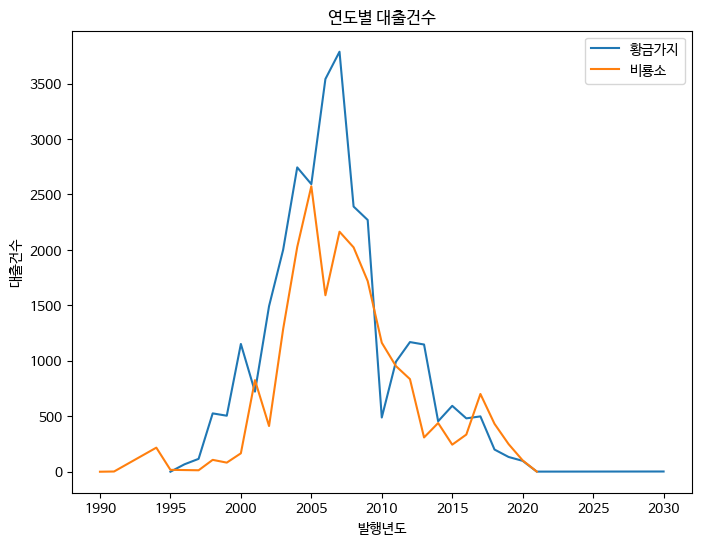

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1["발행년도"], line1["대출건수"], label="황금가지")
ax.plot(line2["발행년도"], line2["대출건수"], label="비룡소")
ax.set_title("연도별 대출건수")
ax.set_xlabel("발행년도")
ax.set_ylabel("대출건수")

# 범례 출력 세팅
ax.legend()
fig.show()

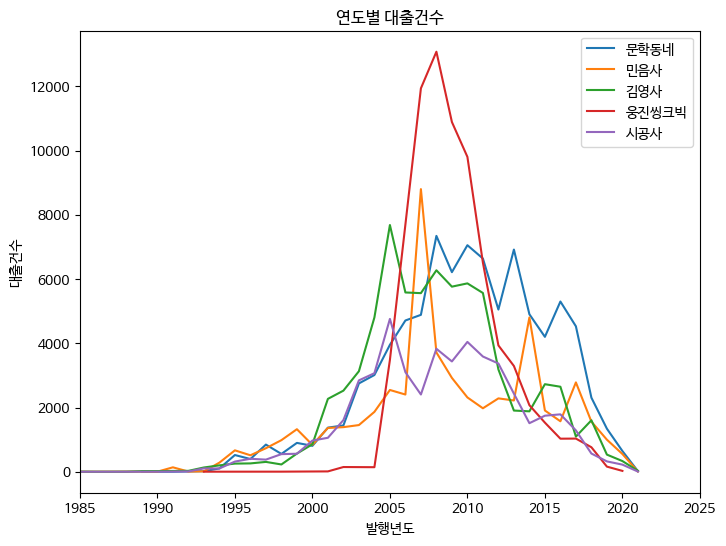

In [49]:
# 출판사의 대출건수 상위 5개의 출판사 데이터 비교 그래프
fig, ax = plt.subplots(figsize=(8, 6))
# 상위 출판사 30개 데이터 -> 상위 5개 index[:5]
for pub in top30_pubs.index[:5]:
    # 출판사 데이터
    line = ns_book9[ns_book9["출판사"] == pub] # 상위 5개 출판사가 선택됩니다.
    # label=pub - 출판사 별로 출판사 이름 표시
    ax.plot(line["발행년도"], line["대출건수"], label=pub) # 5개 출판사에 대한 선 그래프를 그립니다.
# 출력할 라벨 설정
ax.set_title("연도별 대출건수")
ax.set_xlabel("발행년도")
ax.set_ylabel("대출건수")

# 범례 출력 설정
ax.legend()

# x축 데이터의 표시 설정
ax.set_xlim(1985, 2025)
fig.show()

In [9]:
# 피벗 테이블(pivot_table)
ns_book10 = ns_book9.pivot_table(index="출판사", columns="발행년도")
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [10]:
ns_book10.columns[:10]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977),
            ('대출건수', 1978),
            ('대출건수', 1979),
            ('대출건수', 1980),
            ('대출건수', 1981),
            ('대출건수', 1982)],
           names=[None, '발행년도'])

In [11]:
# 10개의 출력사 선택
top10_pubs = top30_pubs.index[:10]
# 전체 년도에 해당되는 데이터
year_cols = ns_book10.columns.get_level_values(1)

In [54]:
top10_pubs

Index(['문학동네', '민음사', '김영사', '웅진씽크빅', '시공사', '창비', '문학과지성사', '위즈덤하우스', '학지사',
       '한울'],
      dtype='object', name='출판사')

In [55]:
year_cols

Index([1947, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2030],
      dtype='int64', name='발행년도')

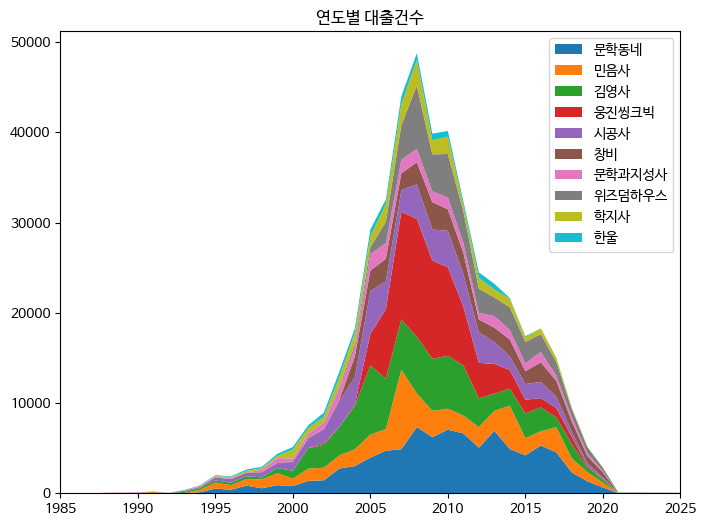

In [12]:
# ax - subplots 가져오기
fig, ax = plt.subplots(figsize=(8, 6))
# stackplot() - 누적 그래프. stackplot(x축 데이터, y축 데이터)
# fillna(0) - NaN 연산 처리를 위해 -> 0으로 바꾼다.
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
ax.set_title("연도별 대출건수")
# 범례
ax.legend()
# 데이터 표시 범위
ax.set_xlim(1985, 2025)
fig.show()

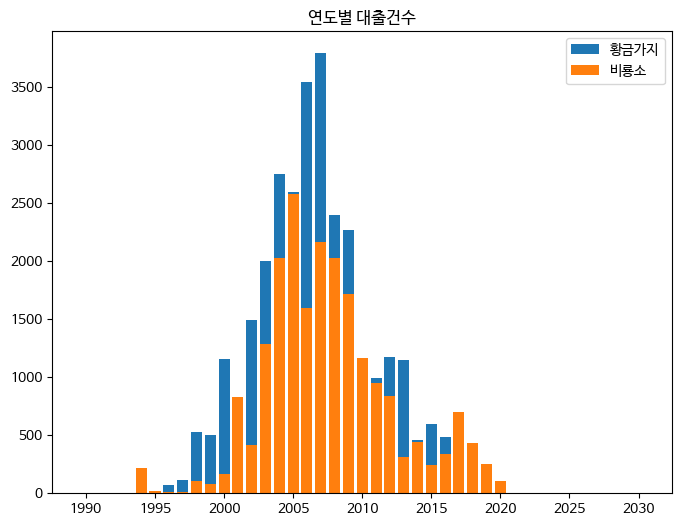

In [13]:
# 하나의 피겨에 여러 개의 막대 그래프 그리기
# ax 객체 꺼내기
fig, ax = plt.subplots(figsize=(8, 6))
# 데이터가 2개를 세팅하면 둘다 표시가 된다. 2번째 데이터가 덮어씌어진다.
ax.bar(line1["발행년도"], line1["대출건수"], label="황금가지")
ax.bar(line2["발행년도"], line2["대출건수"], label="비룡소")
ax.set_title("연도별 대출건수")
ax.legend()
fig.show()

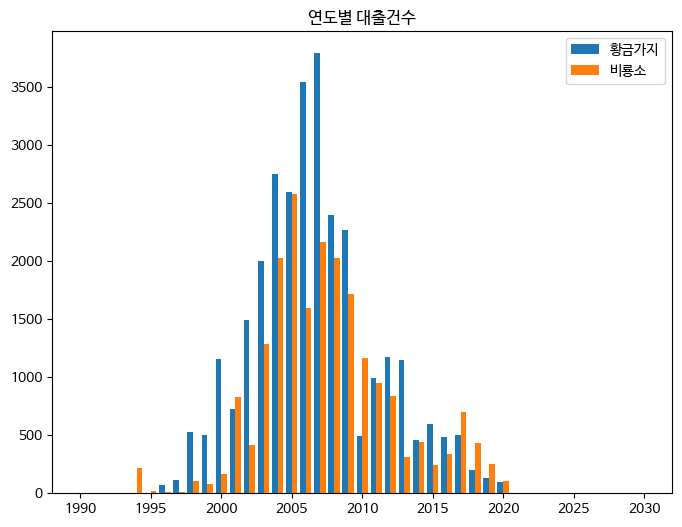

In [14]:
# 데이터 2개를 비교하는 막대 그래프 - 데이터가 많아지면 선택이 힘들다.
fig, ax = plt.subplots(figsize=(8, 6))
# 막대의 너비 0.4 세팅. 앞에 데이터는 왼쪽으로 0.2, 뒤에 데이터는 뒤오 0.2 이동
ax.bar(line1["발행년도"]-0.2, line1["대출건수"], width=0.4, label="황금가지")
ax.bar(line2["발행년도"]+0.2, line2["대출건수"], width=0.4, label="비룡소")
ax.set_title("연도별 대출건수")
ax.legend()
fig.show()

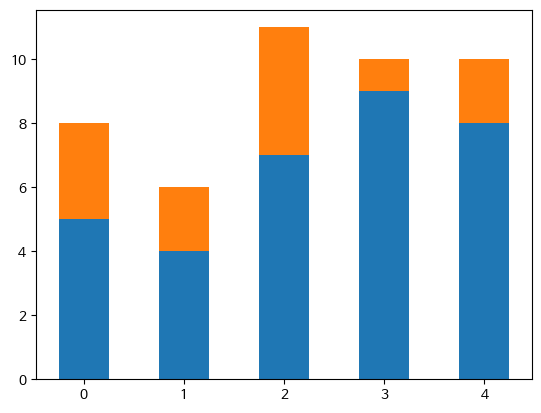

In [69]:
# 스택 막대 그래프
# 데이터 준비
height1 = [5, 4, 7, 9, 8]
height2 = [3, 2, 4, 1, 2]

# 그래프 세팅
# range(5) - 0 - 4 리스트 데이터
plt.bar(range(len(height1)), height1, width=0.5)
# bottom=height1 : height2를 표시할 때 아래쪽의 위치를 지정해서 표시하면 누적이 돕니다.
plt.bar(range(len(height2)), height2, bottom=height1, width=0.5)
plt.show()

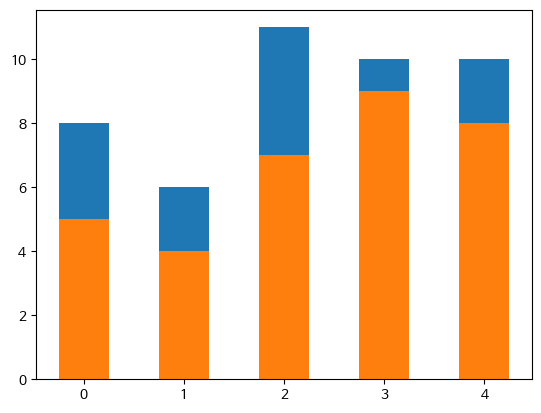

In [73]:
# 스택 막대 그래프 세팅
# zip(list1, list2) - (list[i], list2[i]) - 튜플로 만들어 준다.
height3 = [a + b for a, b in zip(height1, height2)]
# range(5) - 0 ~ 4 리스트 데이터
plt.bar(range(len(height3)), height3, width=0.5)
# height3 위에 height1을 덮어쓰기로 그렸다. - 덮어쓰기한 나머지 데이터가 height2 에 해당된다.
# plt.bar(range(len(height1)), height1, bottom=height1, width=0.5)
plt.bar(range(len(height1)), height1, width=0.5)
plt.show()

In [53]:
# 데이터값 누적하여 그리기
ns_book10.loc[top10_pubs[:5], ("대출건수",2013):("대출건수",2020)]

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
출판사                                                                 
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [56]:
ns_book10.loc[top10_pubs[:5], ("대출건수",2013):("대출건수",2020)].cumsum()

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
출판사                                                                       
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

In [57]:
# 전체 데이터를 대상으로
ns_book12 = ns_book10.loc[top10_pubs].cumsum()

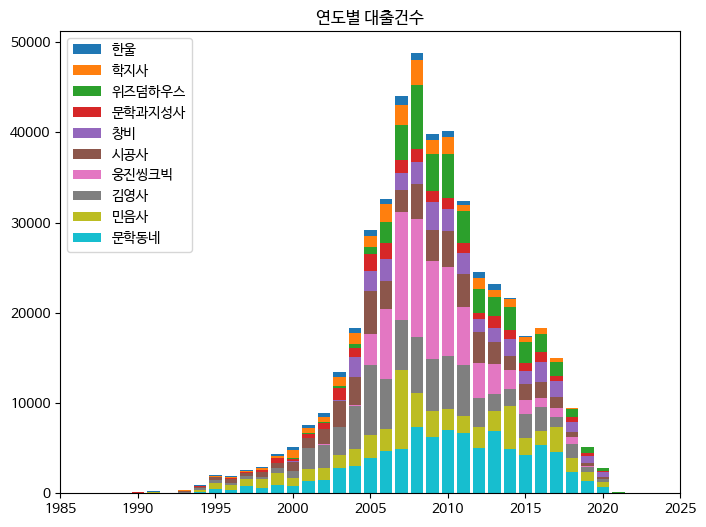

In [85]:
# 여러개의 데이터를 비교하고 전체 누적 데이터 표시 막대 그래프 - 데이터가 많아지면 선택이 힘들다.
fig, ax = plt.subplots(figsize=(8, 6))
# 누적 데이터인 ns_book12를 역순으로 처리해서 데이터를 세팅한다.
# ns_book12의 열이름을 가져와서 year_cols 저장한다.
# year_cols = ns_book12.columns.get_level_values(1)
# 가장 큰 막대부터 그려야 하므로 누적 합계가 가장 큰 마지막 출판사부터 그립니다.
for i in reversed(range(len(ns_book12))):
    # 행을 선택
    bar = ns_book12.iloc[i] # 행 추출
    # 데이터 확인용 출력
    # print(bar)
    # print(year_cols)
    # 누적 데이터의 인덱스를 출판사입니다. index[i] - i 번째 데이터의 인덱스가 나온다. => 출판사 이름이 된다.
    label = ns_book12.index[i] # 출판사 이름 추출
    # 한개의 그래프 데이터 세팅
    # ax.bar(x축 데이터 - 년도, y축 데이터 - 출판사 누적 대출건수, 라벨 - 출판사명)
    ax.bar(year_cols, bar, label=label)
ax.set_title("연도별 대출건수")
# 범례
ax.legend(loc="upper left")
ax.set_xlim(1985, 2025)
fig.show()

In [94]:
# 원 그래프 그리기 (파아차트 : pie chart)
data = top30_pubs[:10] # 상위 10개 출판사의 도서 개수를 선택하여 저장합니다.
labels = top30_pubs.index[:10] # 상위 10개 출판사의 인덱스를 저장합니다.
print(data)
print(labels)

출판사
문학동네      4410
민음사       3349
김영사       3246
웅진씽크빅     3227
시공사       2685
창비        2469
문학과지성사    2064
위즈덤하우스    1981
학지사       1877
한울        1553
Name: count, dtype: int64
Index(['문학동네', '민음사', '김영사', '웅진씽크빅', '시공사', '창비', '문학과지성사', '위즈덤하우스', '학지사',
       '한울'],
      dtype='object', name='출판사')


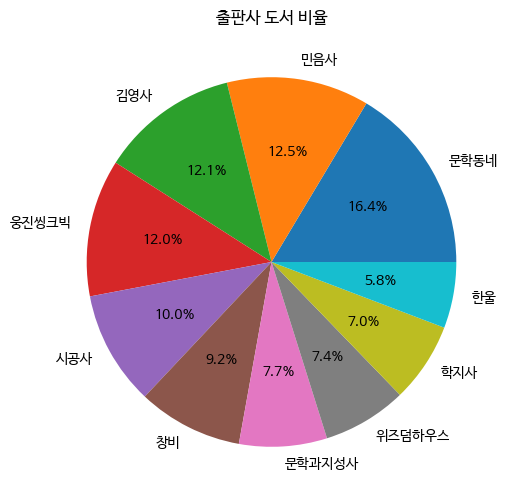

In [103]:
# 원 그래프 그리기 - 파이 차트라고도 한다.
fig, ax = plt.subplots(figsize=(8, 6))
# 한 개의 데이터를 파이 형식으로 표시 - 모든 데이터가 다 표시가 되면 원이 된다.
ax.pie(data, labels=labels, autopct="%.1f%%")
# ax.pie(data, labels=labels)
ax.set_title("출판사 도서 비율")
fig.show()

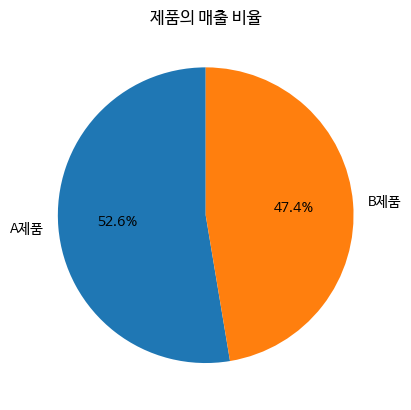

In [101]:
# startangle=90 - 그리기 시작하는 각도 설정 - 90(각도)는 맨 위를 가르킨다.
plt.pie([10,9], labels=["A제품", "B제품"], autopct="%.1f%%", startangle=90) # startangle=90 : 90도 각도부터 시작
# plt.pie([10,9], labels=["A제품", "B제품"], startangle=90)
plt.title("제품의 매출 비율")
plt.show()

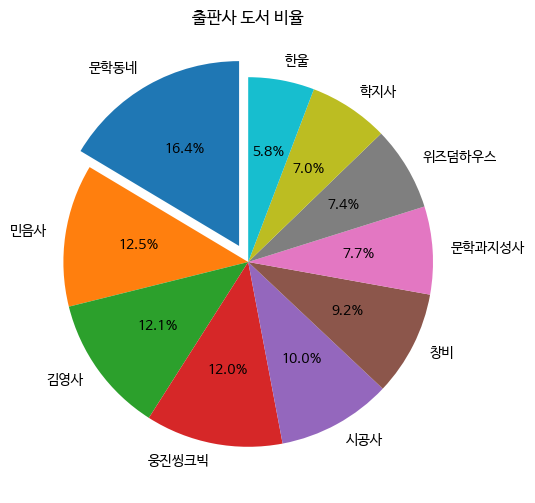

In [117]:
# 데이터 표시 - autopct="%.1f%%" : .1f는 각 조각에서 소수점 첫째 자리까지만 표시하라는 의미
fig, ax = plt.subplots(figsize=(8, 6))
# startangle=90 - 90도 부터 시작 : 12시 방향에서 반시계방향으로 그린다.
# autopct : automatic percentage / %% -> 문자열로 %를 의미
# explode : 터뜨리다. 각 조각을 중심에서 얼마나 띄울지
# - 표시 데이터 만큼 작성 - [튀어 나오는 정도]+[튀어 나오는 정도]*여러데이터
ax.pie(data, labels=labels, startangle=90, autopct="%.1f%%", explode=[0.1]+[0]*9)
# ax.pie(data, labels=labels, startangle=90, autopct="%.1f%%", explode=[0.1]*2+[0]*7+[0.2])
ax.set_title("출판사 도서 비율")
fig.show()

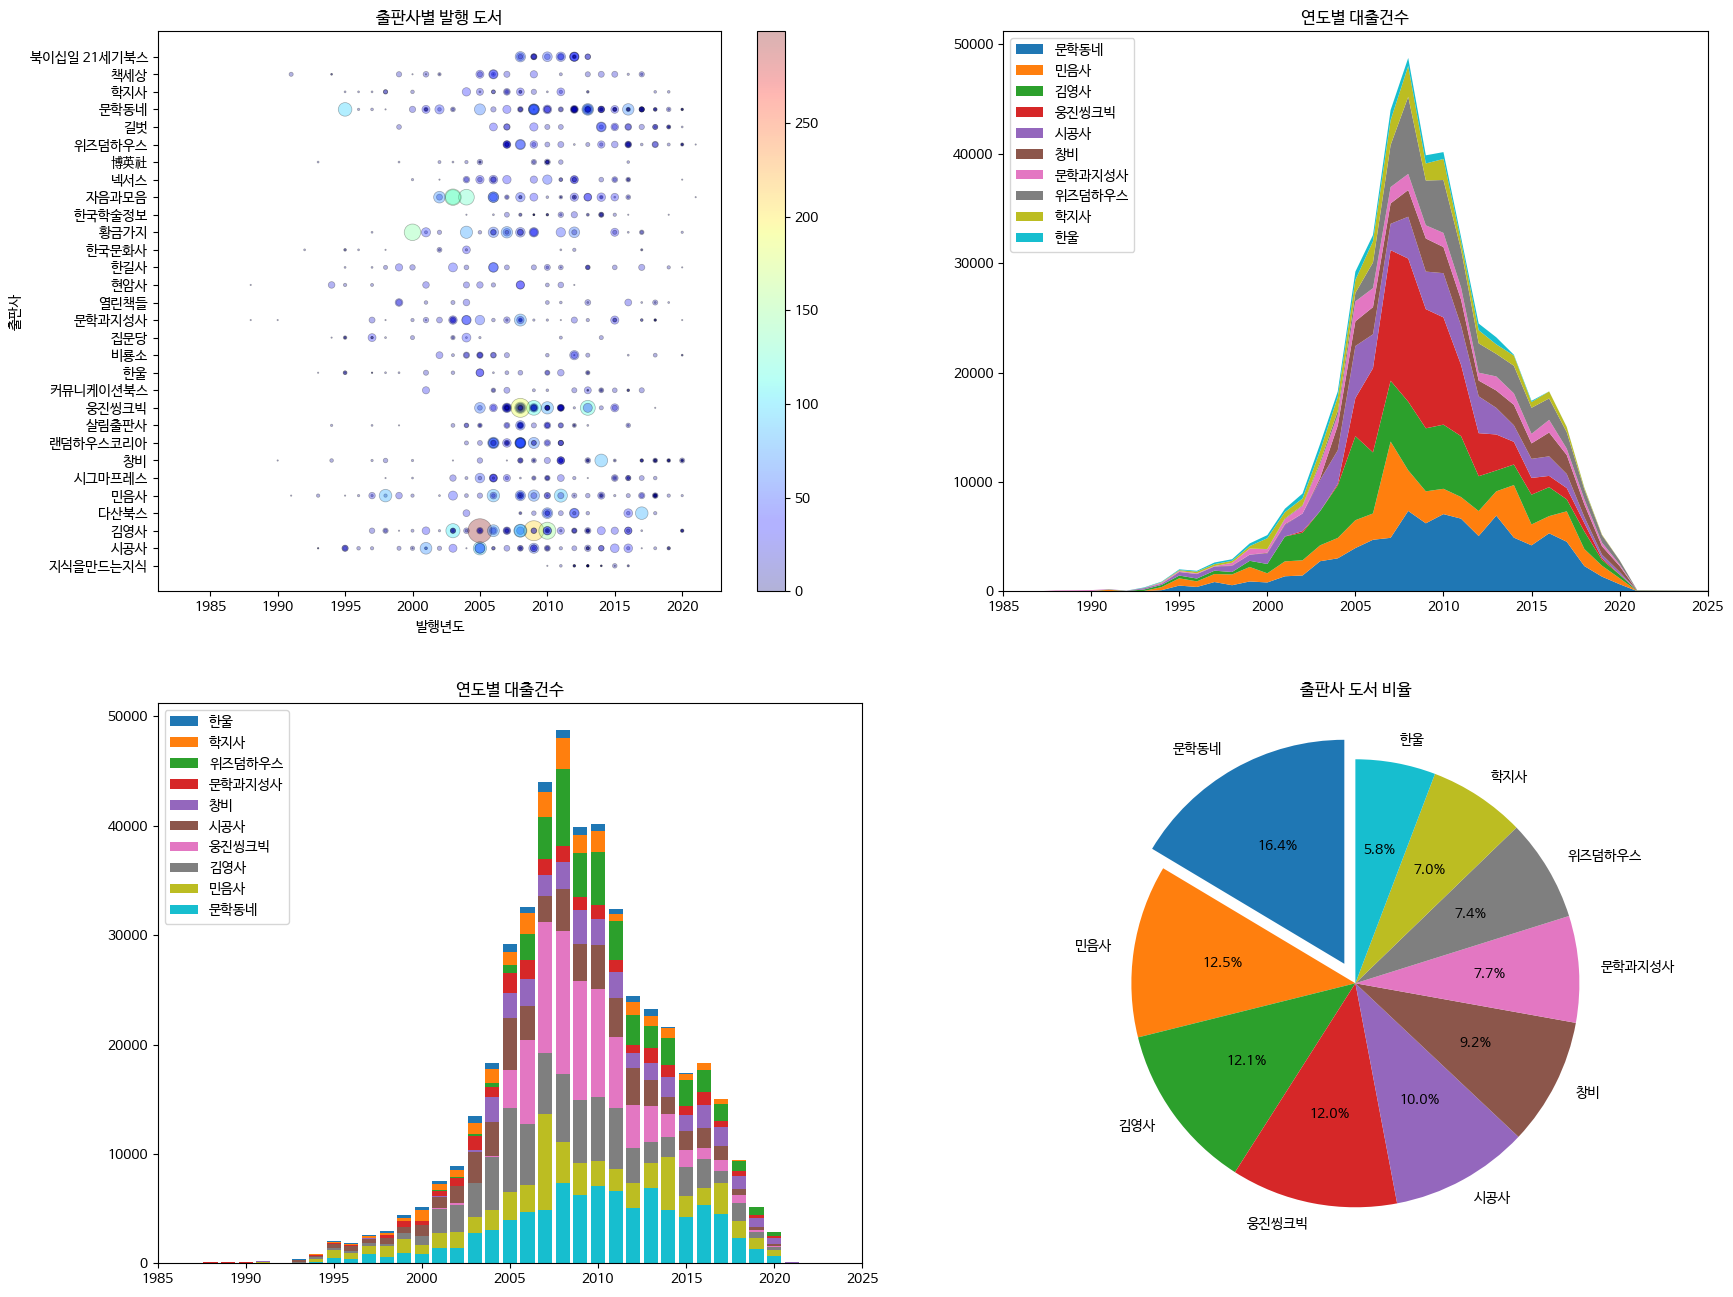

In [124]:
# 그래프 4개 그리기
# 4개의 그래프 한개당 한개의 ax 필요하다.
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 산점도 - 컬러바와 함께
# 산점도 데이터 준비하기 - 샘플링 데이터
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
sc = axes[0, 0].scatter(ns_book8["발행년도"], ns_book8["출판사"],
                        # 테두리 라인의 두께, 색상(k-검정), 투명도 세팅
                        linewidths=0.5, edgecolors="k", alpha=0.3,
                        # 점의 사이즈, 색상, 색상표 설정
                        s=ns_book8["대출건수"], c=ns_book8["대출건수"], cmap="jet")
axes[0, 0].set_title("출판사별 발행 도서")
axes[0, 0].set_xlabel("발행년도")
axes[0, 0].set_ylabel("출판사")
fig.colorbar(sc, ax=axes[0, 0]) # 크기에 따라 색상 바를 넣어서 표시


# 스택 영역 그래프
# stackplot() - 누적 그래프. stackplot(x축 데이터, y축 데이터)
# fillna(0) - NaN 연산 처리를 위해 -> 0으로 바꾼다.
axes[0, 1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
axes[0, 1].set_title("연도별 대출건수")
# 범례 / upper : 위, left : 왼쪽
axes[0, 1].legend(loc="upper left") # 범례 위치 지정 : loc="upper left"
# 데이터 표시 범위
axes[0, 1].set_xlim(1985, 2025)


# 스택 막대 그래프 ( 위 작성한 그래프 그대로 )
for i in reversed(range(len(ns_book12))):
    # 행을 선택
    bar = ns_book12.iloc[i]
    # 데이터 확인용 출력
    # print(bar)
    # print(year_cols)
    # 누적 데이터의 인덱스를 출판사입니다. index[i] - i 번째 데이터의 인덱스가 나온다. => 출판사 이름이 된다.
    label = ns_book12.index[i]
    # 한개의 그래프 데이터 세팅
    # ax.bar(x축 데이터 - 년도, y축 데이터 - 출판사 누적 대출건수, 라벨 - 출판사명)
    axes[1, 0].bar(year_cols, bar, label=label)
axes[1, 0].set_title("연도별 대출건수")
# 범례
axes[1, 0].legend(loc="upper left")
axes[1, 0].set_xlim(1985, 2025)


# 원 그래프(파이 그래프)
# 한개의 데이터를 파이 형식으로 표시 - 모든 데이터가 다 표시가 되면 원이 된다.
# startangle=90 - 90도 부터 시작 : 12시 방향에서 반시계방향으로 그린다.
# 데이터 표시 - autopct="%.1f%%" : .1f는 각 조각에서 소수점 첫째 자리까지만 표시하라는 의미
# autopct : automatic percentage / %% -> 문자열로 %를 의미
# explode : 터뜨리다. 각 조각을 중심에서 얼마나 띄울지
# - 표시 데이터 만큼 작성 - [튀어 나오는 정도]+[튀어 나오는 정도]*여러데이터
axes[1, 1].pie(data, labels=labels, startangle=90, autopct="%.1f%%", explode=[0.1]+[0]*9)
axes[1, 1].set_title("출판사 도서 비율")

# 이미지 저장
fig.savefig("all_in_one.png")
# 보이게
fig.show()


In [118]:
ns_book11 = ns_book9.pivot_table(index="발행년도", columns="출판사", values="대출건수")
ns_book11.loc[2000:2005]

출판사,博英社,길벗,김영사,넥서스,다산북스,랜덤하우스코리아,문학과지성사,문학동네,민음사,북이십일 21세기북스,...,창비,책세상,커뮤니케이션북스,학지사,한국문화사,한국학술정보,한길사,한울,현암사,황금가지
발행년도,,,,,,,,,,,,,,,,,,,,,
2000,237.0,7.0,854.0,194.0,NaN,3.0,316.0,806.0,836.0,NaN,...,57.0,369.0,37.0,988.0,84.0,36.0,536.0,287.0,274.0,1152.0
2001,267.0,202.0,2269.0,228.0,NaN,17.0,449.0,1373.0,1363.0,NaN,...,70.0,355.0,184.0,582.0,110.0,3.0,1626.0,305.0,481.0,722.0
2002,458.0,472.0,2525.0,1154.0,NaN,20.0,686.0,1442.0,1388.0,NaN,...,0.0,794.0,80.0,625.0,134.0,47.0,777.0,450.0,398.0,1493.0
2003,444.0,795.0,3130.0,3069.0,NaN,489.0,1262.0,2750.0,1453.0,NaN,...,191.0,289.0,110.0,1006.0,215.0,95.0,1114.0,636.0,471.0,2001.0
2004,630.0,976.0,4804.0,2355.0,212.0,618.0,952.0,3012.0,1864.0,42.0,...,2268.0,637.0,476.0,1270.0,392.0,91.0,1318.0,502.0,661.0,2744.0
2005,788.0,2162.0,7684.0,1162.0,509.0,941.0,1827.0,3952.0,2546.0,NaN,...,2256.0,1103.0,820.0,1179.0,243.0,123.0,1461.0,767.0,835.0,2593.0


In [120]:
import numpy as np

ns_book11 = ns_book7[top30_pubs_idx].pivot_table(
    index="발행년도", columns="출판사", values="대출건수",
    aggfunc=np.sum)
ns_book11.loc[2000:2005]

<ipython-input-120-b2e4ac2cde28>:3: FutureWarning: The provided callable <function sum at 0x7decfe690ea0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ns_book11 = ns_book7[top30_pubs_idx].pivot_table(


출판사,博英社,길벗,김영사,넥서스,다산북스,랜덤하우스코리아,문학과지성사,문학동네,민음사,북이십일 21세기북스,...,창비,책세상,커뮤니케이션북스,학지사,한국문화사,한국학술정보,한길사,한울,현암사,황금가지
발행년도,,,,,,,,,,,,,,,,,,,,,
2000,237.0,7.0,854.0,194.0,NaN,3.0,316.0,806.0,836.0,NaN,...,57.0,369.0,37.0,988.0,84.0,36.0,536.0,287.0,274.0,1152.0
2001,267.0,202.0,2269.0,228.0,NaN,17.0,449.0,1373.0,1363.0,NaN,...,70.0,355.0,184.0,582.0,110.0,3.0,1626.0,305.0,481.0,722.0
2002,458.0,472.0,2525.0,1154.0,NaN,20.0,686.0,1442.0,1388.0,NaN,...,0.0,794.0,80.0,625.0,134.0,47.0,777.0,450.0,398.0,1493.0
2003,444.0,795.0,3130.0,3069.0,NaN,489.0,1262.0,2750.0,1453.0,NaN,...,191.0,289.0,110.0,1006.0,215.0,95.0,1114.0,636.0,471.0,2001.0
2004,630.0,976.0,4804.0,2355.0,212.0,618.0,952.0,3012.0,1864.0,42.0,...,2268.0,637.0,476.0,1270.0,392.0,91.0,1318.0,502.0,661.0,2744.0
2005,788.0,2162.0,7684.0,1162.0,509.0,941.0,1827.0,3952.0,2546.0,NaN,...,2256.0,1103.0,820.0,1179.0,243.0,123.0,1461.0,767.0,835.0,2593.0


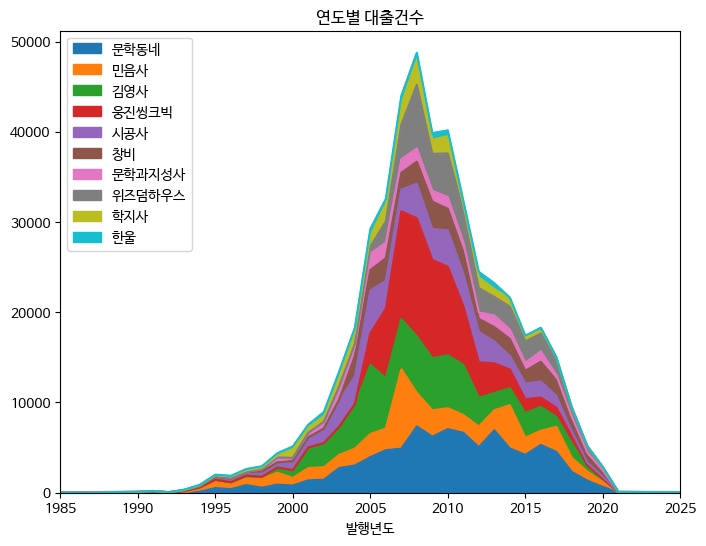

In [121]:
fig, ax = plt.subplots(figsize=(8, 6))
ns_book11[top10_pubs].plot.area(ax=ax, title="연도별 대출건수", xlim=(1985, 2025))
ax.legend(loc="upper left")
fig.show()

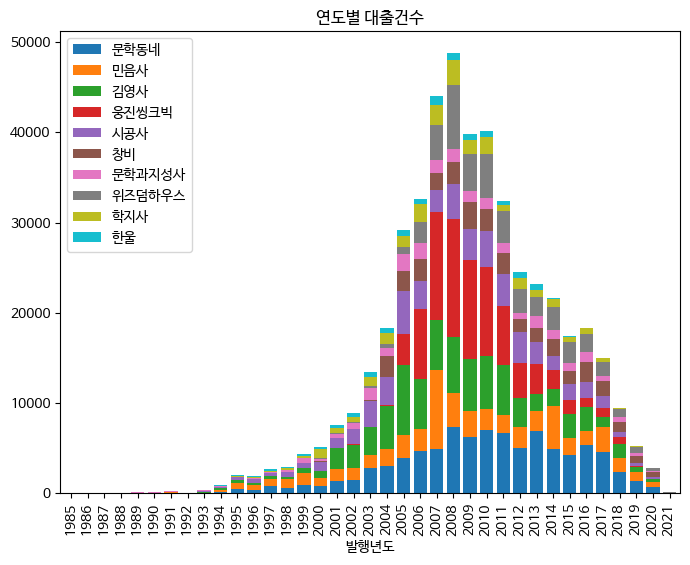

In [122]:
# 스택 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 6))
ns_book11.loc[1985:2025, top10_pubs].plot.bar(ax=ax, title="연도별 대출건수", stacked=True, width=0.8)
ax.legend(loc="upper left")
fig.show()